# Análise de Dados 

Nesse arquivo contém a Análise e Tratamento dos Dados de um Data Frame  da Prefeitura do Recife
que traz dados sobre o detalhamento e disposição das ciclovias e ciclofaixas da Cidade do Recife.



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_csv("detalhamentocicloviario_recife.csv", sep=";" , encoding= 'UTF-8')

# Tratamento de Dados, Filtros e Consultas

-  Exibição das 70 primeiras linhas - Método Head () 
-  Exibindo as Informações do Data Frame e os tipos de objetos que ele contém. - Método Info ()
    (Se existem campos nulos por exemplo) 
-  Exibindo o Corpo do Data Frame, quantidade de linhas e colunas -  Método Shape ()
-  Exibindo os dados considerando o ano de inauguração mais recente para o mais antigo com o método Sort_values() 
-  Filtrando os registros que foram inaugurados apenas no ano de 2020 
-  Consulta  dos registros onde a ciclovia/ ciclofaixa é localizada nos bairros de Santo Amaro e Ibura - Método Query() 

In [100]:
#Exibindo as 70 primeiras linhas do Data Frame
df.head(70)

,rota,tipologia,sentido,percurso,bairros,extensao,inauguracao
0,Ciclovia Norte,Ciclovia,Bidirecional,Início no cruzamento da Rua da Aurora com a Av...,Santo Amaro,"1,47",2011
1,Ciclofaixa do Cavouco,Ciclofaixa,Unidirecional,Início na Av. Caxangá com a Av. Mário Álvares ...,Cordeiro e Iputinga,"2,3",2007
2,Ciclovia Orla,Ciclovia,Bidirecional,Início a 63 metros da Rua Dr. Arlindo dos Sant...,Boa Viagem e Pina,"7,85",2004
3,Ciclofaixa Brasília Teimosa,Ciclofaixa e Ciclorrota,Bidirecional,Início no cruzamento da Av. Boa Viagem com a A...,Pina e Brasília Teimosa,"1,41",2004
4,Rota Tiradentes,Ciclofaixa e Ciclorrota,Bidirecional,"Estrada do Forte do Arraial Novo do Bom Jesus,...","Cordeiro, Torrões, San Martin, Mangueira, Must...","5,6",2005
...,...,...,...,...,...,...,...
65,Ciclofaixa João de Barros,Ciclofaixa,Unidirecional e Bidirecional,"Rua dos Palmares, Rua Dr. Carlos Chagas e Av. ...",Santo Amaro,"1,0",2021
66,Ciclofaixa Torre,Ciclofaixa e Ciclorrota,Unidirecional e Bidirecional,"Rua Conselheiro Theodoro, Praça Professor Barr...","Torre, Cordeiro e Zumbi","2,8",2021
67,Ciclovia Bruno Veloso,"Ciclofaixa, Ciclovia e Área compartilhada",Bidirecional,Rua Bruno Veloso.,Boa Viagem,"1,0",2022
68,Rota Parque das Graças,Ciclorrota e Área Compartilhada,Unidirecional,Av. Beira Rio.,Graças,"0,2",2022


In [68]:
# Exibindo as Informações do Data Frame e os tipos de objetos que ele contém. 
 

df.info()


# O data Frame não contém valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rota         78 non-null     object
 1   tipologia    78 non-null     object
 2   sentido      78 non-null     object
 3   percurso     78 non-null     object
 4   bairros      78 non-null     object
 5   extensao     78 non-null     object
 6   inauguracao  78 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 4.4+ KB


In [69]:
# Exibindo o Corpo do Data Frame, quantidade de linhas e colunas 
df.shape

(78, 7)

In [103]:
# Exibindo os dados considerando o ano de inauguração mais recente para o mais antigo com o método sort
df_inauguracaosort = df.sort_values(by='inauguracao', ascending=False) 
df_inauguracaosort


,rota,tipologia,sentido,percurso,bairros,extensao,inauguracao
77,Ciclofaixa Marquês do Paraná,Ciclofaixa e Ciclorrota,Bidirecional,Rua Marquês do Paraná até a Rua Castro Alves. ...,Espinheiro e Encruzilhada,"1,5",2023
76,Ciclofaixa Paissandu,Ciclofaixa e Ciclorrota,Bidirecional,"Rua Paissandu, Rua Dom Bosco, Rua Visconde de ...",Boa Vista,"4,2",2023
75,Ciclofaixa Padre Inglês,Ciclofaixa,Bidirecional,Rua Padre Inglês.,Boa Vista,"0,5",2022
74,Ciclofaixa Torre (2a etapa),Ciclofaixa e Ciclorrota,Bidirecional,"Av. Beira Rio, Rua Marcos André, Rua Real da T...",Torre,"3,5",2022
73,Ciclofaixa Francisco Trindade,Ciclofaixa,Bidirecional,Rua Professor Francisco da Trindade e Rua Herm...,Campo Grande,"1,0",2022
...,...,...,...,...,...,...,...
0,Ciclovia Norte,Ciclovia,Bidirecional,Início no cruzamento da Rua da Aurora com a Av...,Santo Amaro,"1,47",2011
1,Ciclofaixa do Cavouco,Ciclofaixa,Unidirecional,Início na Av. Caxangá com a Av. Mário Álvares ...,Cordeiro e Iputinga,"2,3",2007
4,Rota Tiradentes,Ciclofaixa e Ciclorrota,Bidirecional,"Estrada do Forte do Arraial Novo do Bom Jesus,...","Cordeiro, Torrões, San Martin, Mangueira, Must...","5,6",2005
3,Ciclofaixa Brasília Teimosa,Ciclofaixa e Ciclorrota,Bidirecional,Início no cruzamento da Av. Boa Viagem com a A...,Pina e Brasília Teimosa,"1,41",2004


In [104]:
# Exibindo os registros que foram inaugurados apenas no ano de 2020
df_filtrado = df[df['inauguracao'] == 2020]
df_filtrado

,rota,tipologia,sentido,percurso,bairros,extensao,inauguracao
36,Ciclovia Ibura,Ciclovia,Bidirecional,"Canal Rio da Prata, com início na Av. Dois Rio...",Ibura,"1,0",2020
37,Ciclofaixa Boa Vista (3a etapa),Ciclofaixa e Área Compartilhada,Unidirecional e Bidirecional,Rua Bispo Cardoso Ayres e Beco do Estudante. R...,"Boa Vista, Santo Amaro e Soledade","2,4",2020
38,Rota Geraldão,"Ciclofaixa, Ciclorrota e Área Compartilhada",Bidirecional,"Av. Sen. Robert Kennedy, Rua Dr. Tavares Corre...",Imbiribeira e Ipsep,"3,2",2020
39,Rota Sebastião Salazar,Ciclorrota e Ciclofaixa,Bidirecional,"Rua Manoel Brandão, Rua dos Craveiros, Rua Seb...","Cajueiro, Campina do Barreto e Porto da Madeira","1,9",2020
40,Ciclofaixa Júlio César,Ciclofaixa,Bidirecional,Av. Júlio César da Av. Maria Irene até acesso ...,Jordão,"1,5",2020
41,Ciclofaixa Pinheiros,Ciclofaixa,Bidirecional,"Av. Pinheiros, Rua Amélia Xavier Sampaio, Rua ...",Imbiribeira,"2,0",2020
42,Ciclofaixa Historiador Jordão Emerenciano,Ciclofaixa,Unidirecional e Bidirecional,"Av. Luiz de Lacerda, Av. Historiador Jordão Em...",Iputinga e Caxangá,"1,8",2020
43,Rota Parque Macaxeira,"Ciclofaixa, Ciclorrota e Área Compartilhada",Unidirecional,"Av. José Américo de Almeida, Rua Cel. João Bat...",Apipucos e Macaxeira,"2,8",2020
44,Ciclofaixa Beberibe,Ciclofaixa,Unidirecional e Bidirecional,"Estrada Velha de Água Fria, Rua São Bento, Rua...","Água Fria, Arruda e Bomba do Hemetério","2,2",2020
45,Rota Parque Caiara,Ciclofaixa e Ciclorrota,Unidirecional e Bidirecional,"Parque Caiara, Travessa Dr. José Anastácio da ...",Iputinga,"3,5",2020


In [122]:
df_consulta = df.query("bairros in ('Santo Amaro','Ibura')")
df_consulta


,rota,tipologia,sentido,percurso,bairros,extensao,inauguracao
0,Ciclovia Norte,Ciclovia,Bidirecional,Início no cruzamento da Rua da Aurora com a Av...,Santo Amaro,"1,47",2011
27,Ciclovia Jornalista Graça Araújo (1a etapa),Ciclovia,Bidirecional,Av. Mário Melo e Rua dos Palmares.,Santo Amaro,"2,8",2019
33,Rota Josias de Albuquerque (1a etapa),Ciclofaixa e Ciclorrota,Unidirecional e Bidirecional,Pista local da Avenida Governador Agamenon Mag...,Santo Amaro,"6,8",2019
36,Ciclovia Ibura,Ciclovia,Bidirecional,"Canal Rio da Prata, com início na Av. Dois Rio...",Ibura,"1,0",2020
54,Ciclofaixa Hospício,Ciclofaixa,Bidirecional,Rua do Hospício entre a Rua do Riachuelo e Av....,Santo Amaro,"1,0",2020
63,Rota Josias de Albuquerque (2a etapa),Ciclofaixa e Ciclorrota,Bidirecional,"Rua Treze de Maio, Rua Buarque de Macêdo, Rua ...",Santo Amaro,"1,0",2021
65,Ciclofaixa João de Barros,Ciclofaixa,Unidirecional e Bidirecional,"Rua dos Palmares, Rua Dr. Carlos Chagas e Av. ...",Santo Amaro,"1,0",2021


# Insights 


- Qual a maior ciclofaixa no sentido Unidirecional?
- Qual a menor ciclofaixa no sentido Unidirecional?
- Qual a maior ciclovia no sentido Bidirecional?
- Qual a menor ciclovia no sentido Bidirecional?
- O ano de Início de Inaguração da Primeira Ciclovias
- O ano de Início de Inaguração da Primeira Ciclofaixa
- 3 priemrios bairros que tem mais ciclovia/ciclofaixa/ciclorrota (Gráfico Barra)
- Percentual de ciclovia e Ciclofaixa num geral nos sentidos bidirecionais e unidirecionais (Gráfico Pizza)
- Gráfico Barra Exibindo o número de Ciclovias e Ciclofaixas inauguradas por cada Ano.

In [139]:
# Filtrando a ciclofaixa que tem a maior extensão e tem sentido Unidirecional
filtro_ciclofaixa_max_df = df[(df['tipologia'] == 'Ciclofaixa') & (df['sentido'] == 'Bidirecional')]

max_extensao = filtro_ciclofaixa_max_df['extensao'].max()

print("A ciclofaixa de maior extensão e sentido Bidirecional")
print(max_extensao)

A ciclovia de maior extensão e sentido unidirecional
3,0


In [194]:
# Exibir qual a ciclofaixa tem a menor extensão e sentido Unidirecional
filtro_ciclofaixa_min_df = df[(df['tipologia'] == 'Ciclofaixa') & (df['sentido'] == 'Unidirecional')]

min_extensao = filtro_ciclofaixa_min_df['extensao'].min()

print("A ciclofaixa de menor extensão e sentido Unidirecional")
print(min_extensao)

A ciclofaixa de menor extensão e sentido Unidirecional
2,3


In [135]:
# Filtrando a ciclovia que  tem a maior extensão e sentido  Bidirecional'
filtro_ciclovia_max_df = df[(df['tipologia'] == 'Ciclovia') & (df['sentido'] == 'Bidirecional')]


max_extensao = filtro_ciclovia_max_df['extensao'].max()

print("A ciclovia de maior extensão e sentido Bidirecional:")
print(max_extensao)


A ciclovia de maior extensão é:
7,85


In [195]:
# Filtrando a ciclovia que tem a menor extensão no sentido Bidirecional

filtro_ciclovia_min_df = df[(df['tipologia'] == 'Ciclovia') & (df['sentido'] == 'Bidirecional')]


min_extensao = filtro_ciclovia_min_df['extensao'].min()

print("A ciclovia de menor extensão e sentido Bidirecional:")
print(min_extensao)


A ciclovia de menor extensão e sentido Bidirecional:
0,95


In [147]:
# Ano de Inauguração da primeira ciclofaixa

filtro_ano_min_df = df[(df['tipologia'] == 'Ciclofaixa')]
min_ano_ciclofaixa = filtro_ano_min_df['inauguracao'].min()

print ("A primeira Ciclofaixa foi inaugurada no ano de ")
print (min_ano_ciclofaixa)

# Ano de Inauguração da primeira ciclovia

filtro_ano_min_df = df[(df['tipologia'] == 'Ciclovia')]
min_ano_ciclovia = filtro_ano_min_df['inauguracao'].min()

print ("A primeira Ciclovia foi inaugurada no ano de ")
print (min_ano_ciclovia)


A primeira Ciclofaixa foi inaugurada no ano de 
2007
A primeira Ciclovia foi inaugurada no ano de 
2004


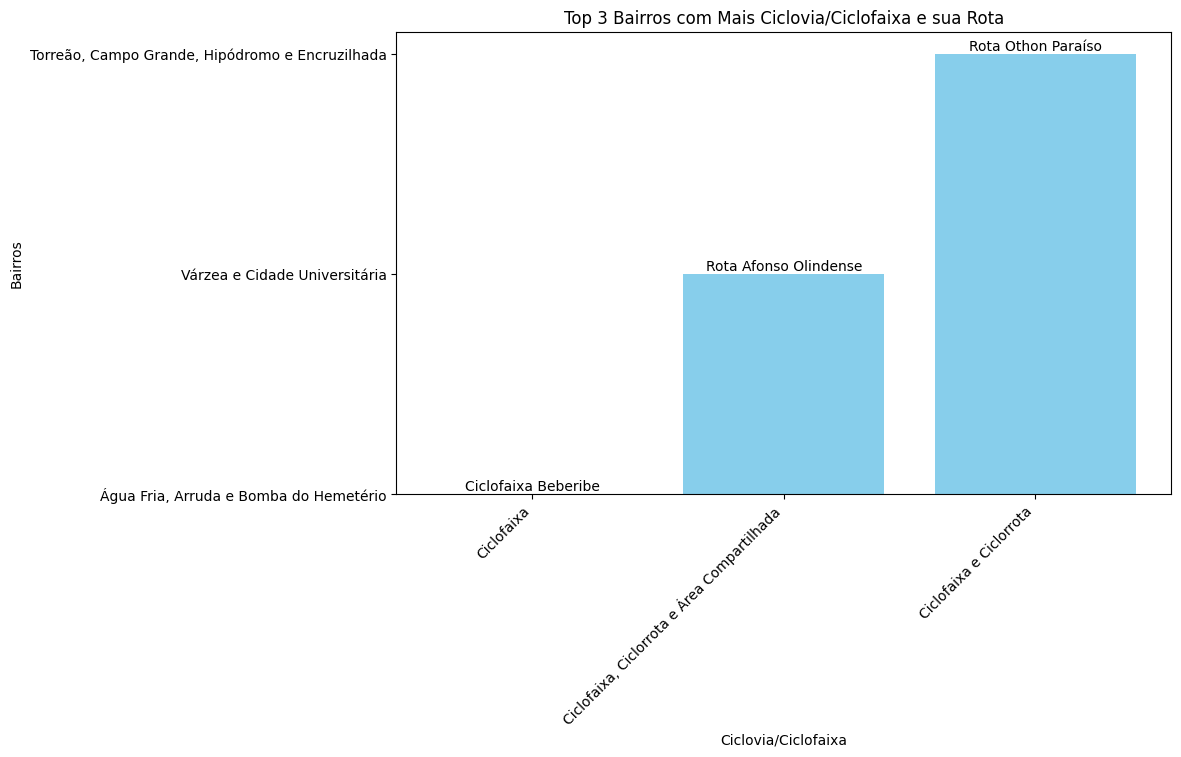

In [197]:
# Filtrar os 3 primeiros bairros que mais tem ciclovia/ciclofaixa?/ciclorrota

top3_bairros = df.sort_values(by='bairros', ascending=False).head(3)

# Gráfico barra para os 3 bairros com ciclofaixa/ciclovia/ciclorrota e suas  respesctivas rotas
plt.figure(figsize=(10, 6))
plt.bar(top3_bairros['tipologia'], top3_bairros['bairros'], color='skyblue')
plt.xlabel('Ciclovia/Ciclofaixa')
plt.ylabel('Bairros')
plt.title('Top 3 Bairros com Mais Ciclovia/Ciclofaixa e sua Rota')
plt.xticks(rotation=45, ha='right')

# Laço for iterando os bairros  e trazendo seu tipo e sua rota.
for  i, bairros in enumerate(top3_bairros['tipologia']):
    rota = top3_bairros.iloc[i]['rota']
    plt.annotate(rota, (bairros, top3_bairros.iloc[i]['bairros']), ha='center', va='bottom')

plt.show()





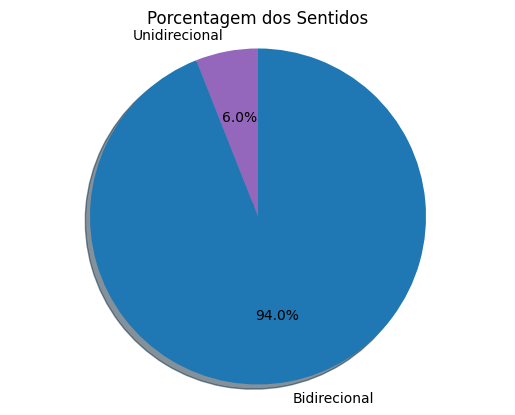

In [186]:
# Gráfico Pizza Exibindo o Percentual da Sentidos em relação as Ciclofaixas e Ciclovias num geral.

#Filtros dentro da Coluna Sentido
filtro_unidirecional_df = df[df['sentido'] == 'Unidirecional']
filtro_bidirecional_df = df[df['sentido'] == 'Bidirecional']

# Calculo do tamanho do filtro Unidirecional
total_uni = len(filtro_unidirecional_df)
#Calculo do tamanho do filtro Bidirecional
total_bi = len(filtro_bidirecional_df)

# Criação do Gráfico Pizza
labels = ['Unidirecional', 'Bidirecional']
sizes = [total_uni, total_bi]
colors = ['tab:purple', 'tab:blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Porcentagem dos Sentidos')
plt.axis('equal')  

plt.show()

  

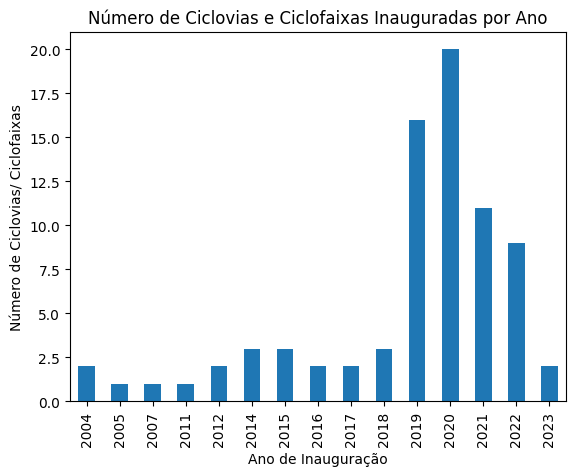

In [193]:
# Convertendo a coluna inauguração para datatime (estava em inteiro), trazendo apenas o parâmetro ano.

df['inauguracao'] = pd.to_datetime(df['inauguracao'], format='%Y')

# Filtrando cada ano existente na coluna inauguração
df['year'] = df['inauguracao'].dt.year

# Variável que guarda um agrupamento por ano faz a contagem de cada ano e realiza um sort do index para exibir 
# em ordem crescente
inauguracao_por_ano = df['year'].value_counts().sort_index()

# Gráfico Barra exibindo a quantidade de Ciclovias e Ciclofaixas inauguradas por Ano
inauguracao_por_ano.plot(kind='bar', color='tab:blue', title='Número de Ciclovias e Ciclofaixas Inauguradas por Ano')
plt.xlabel('Ano de Inauguração')
plt.ylabel('Número de Ciclovias/ Ciclofaixas')
plt.show()